# Homework set 6

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 12, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Michał Sanocki 14623366 Leontii Shtokolenko 14699966

----------------

# Exercise 1 (4.5 points)

A bacterial population $P$ grows according to the geometric progression

$$P_t = rP_{t-1}$$

Where r is the growth rate. The following population counts $P_1 ,\ldots, P_8$ (in billions) are observed:

In [2]:
data = [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14]


# (a)
Read chapter 6.6 on Nonlinear Least squares. Use the Gauss-Newton Method to fit the model function $f(t, x_1, x_2) = x_1\!\cdot x_2^t$ to the data. Find estimates for the initial population $P_0=x_1$ and the growth rate $r=x_2$.

Plot the observed and modeled data and make a separate plot of the residuals.

Text(0, 0.5, 'absolute value of Residuals')

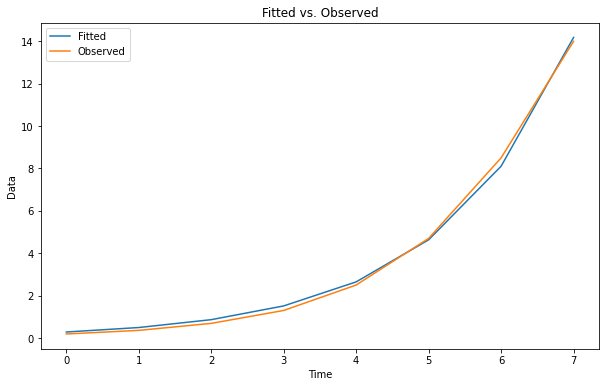

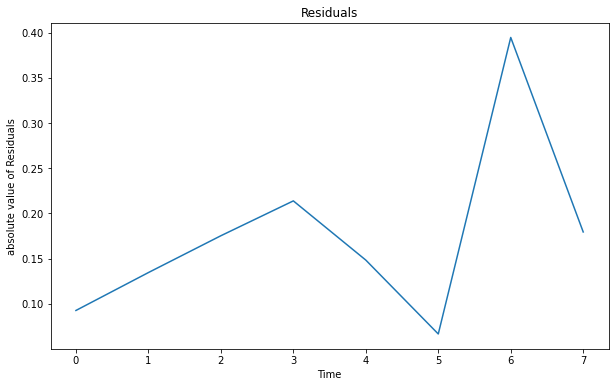

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

def F(t,x_1, x_2):
    f = x_1*x_2**t
    return f

def Jacobian_F(t, x_1, x_2):
    Jacobian = []
    for i in t:
        Jacobian.append([x_2**i, i*x_1*x_2**(i-1)])
    nJacobian = np.array(Jacobian)
    return nJacobian

def residuals_F(y, F,  x_1, x_2):
    residuals = []
    for i in range(len(y)):
        residuals.append([y[i] - F(i ,x_1, x_2)])
    nresiduals = np.array(residuals)
    return nresiduals

def Gauss_Newton(y, F, Jacobian_F, residuals_F, x_1, x_2,  maxits = 1000):
    x = np.array([x_1,x_2]) 
    dx = np.array([1,1])
    t = []
    for j in range(len(y)):
        t.append(j)
    
    i = 0
    residuals = []
    while i < maxits:
        dx = np.array([1,1])

        dx  = np.dot(np.linalg.pinv(-Jacobian_F(t, x[0], x[1])), - residuals_F(y, F,  x[0], x[1]))
        x[0] = x[0] + dx[0] 
        x[1] = x[1] + dx[1] 
        i += 1
    
    Results =  []
    for i in range(len(y)):
        residuals.append([y[i] - F(i ,x[0], x[1])])
        Results.append(F(i ,x[0], x[1]))
    return x, Results, i, residuals

P_t = data[1:]
P_t_1 = data[:-1]

    
t = []
for i in range(len(data)):
        t.append(i)

data = [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14]

r = data[1]/data[0]
Fitted,Results, i, residuals = Gauss_Newton(data, F, Jacobian_F, residuals_F, data[0], r)




plt.figure(figsize=(10, 6))


plt.title(label="Fitted vs. Observed")
plt.plot(t,Results, label = "Fitted")
plt.plot(t,data, label = "Observed")
plt.xlabel('Time')
plt.ylabel('Data')
plt.legend()


plt.figure(figsize=(10, 6))


plt.title(label="Residuals")
plt.plot(t,np.abs(residuals))
plt.xlabel('Time')
plt.ylabel('absolute value of Residuals')


# (b) 
Let $f$ be a vector valued function $f = [ f_1, \ldots, f_m ]^T$. In weighted least squares one aims to minimize the objective function
$$
  \phi(x) = \frac{1}{2} \sum_{i=1}^m W_{ii} ( f_i(x) - y_i) ^2 , \qquad
  W_{ii} = \frac{1}{\sigma_i^2} , 
$$
where $\sigma_i$ is an estimate of the standard deviation in the data point $y_i$. This is equivalent to the standard least squares problem 
$$
\min_x \frac{1}{2} \| F(x) - Y \|^2
$$
with $F(x) = T f(x)$  , $Y = T y$, where $T$ is the diagonal matrix with $\frac{1}{\sigma_i}$ on the diagonal. Assume that for each data point $y_i$ in the list above, the estimate for the standard deviation is given by
$$
  \sigma_i = 0.05 y_i .
$$ 
Perform a weighted least squares fit to obtain estimates for $P_0 = x_1$ and $r = x_2$.
Plot the observed and modeled data and make a separate plot of the residuals.

Are the results different from those of part (a)? Discuss and explain the differences.


[0.009500000000000001, 0.018, 0.034499999999999996, 0.065, 0.125, 0.23500000000000001, 0.42500000000000004, 0.7000000000000001]


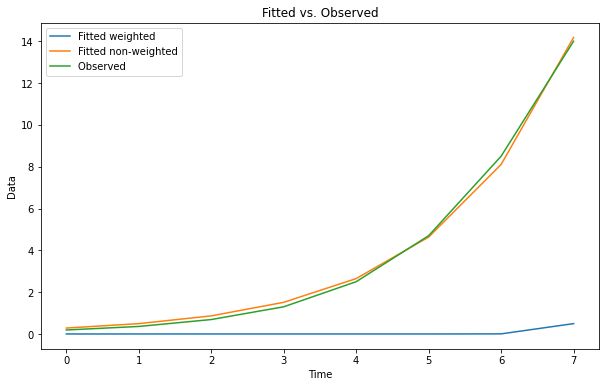

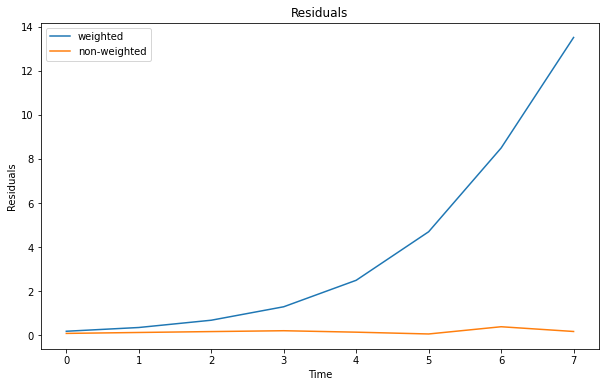

In [5]:
sigma = [i * 0.05 for i in data]

def F(t,x_1, x_2, sigma):
    f = (x_1*x_2**t)/sigma
    return f

def Jacobian_F(t, x_1, x_2,sigma):
    Jacobian = []
    for i in t:
        Jacobian.append([(x_2**i)/sigma[i], i/sigma[i]*x_1*x_2**(i-1)])
    nJacobian = np.array(Jacobian)
    return nJacobian

def residuals_F(y, F,  x_1, x_2,sigma):
    residuals = []
    for i in range(len(y)):
        residuals.append([y[i] - F(i ,x_1, x_2,sigma[i])])
    nresiduals = np.array(residuals)
    return nresiduals

def Gauss_Newton_weighted(y, F, Jacobian_F, residuals_F, x_1, x_2, sigma, maxits = 1000):
    
    x = np.array([x_1,x_2]) 
    dx = np.array([1,1])
    t = []
    y_weighted= []
    for j in range(len(y)):
        t.append(j)
    
    i = 0
    residuals = []
    while i < maxits:
        dx = np.array([1,1])

        dx  = np.dot(np.linalg.pinv(-Jacobian_F(t, x[0], x[1],sigma)), - residuals_F(sigma, F,  x[0], x[1],sigma))
        x[0] = x[0] + dx[0] 
        x[1] = x[1] + dx[1] 
        i += 1
    
    Results =  []
    for i in range(len(y)):
        residuals.append([y[i] - F(i ,x[0], x[1],1)])
        Results.append(F(i ,x[0], x[1],1))
    return x, Results, i, residuals
r = data[1]/data[0]

Fitted_w,Results_w, i_w, residuals_w = Gauss_Newton_weighted(data, F, Jacobian_F, residuals_F, data[0], r,sigma)

plt.figure(figsize=(10, 6))

plt.title(label="Fitted vs. Observed")
plt.plot(t,Results_w, label = "Fitted weighted")
plt.plot(t,Results, label = "Fitted non-weighted")
plt.plot(t,data, label = "Observed ")
plt.xlabel('Time')
plt.ylabel('Data')
plt.legend()

plt.figure(figsize=(10, 6))

plt.title(label="Residuals")
plt.plot(t,np.abs(residuals_w), label = "weighted")
plt.plot(t,np.abs(residuals), label = "non-weighted")
plt.xlabel('Time')
plt.ylabel('absolute value of Residuals')
plt.legend()



The results for the weighted variant differ significantly from those for the non-weighted. Altugh in the beggining  residuals are still relatively low, later we can observe significant increase in residuals compared to non-weighted variant. This can be explained by the fact that the utilized variant of weighted least squares gives higher priority (due to higher $W_{ii}$) to data point with lower $y_i$ . Thus we should expect that in our case residuals are going to increase with time, since population rises with time. Overall the non-weighted version performs much better than the weighted version (which is too be expected since we modified the function, that we are trying to miznimize), but suprisesingly even for the earlier t values (which have high $W_{ii}$) performance is better for non-weighted version, this might be a result of changes to the minimized function. It is also possible that some differences may arise due to different convargence rates and results for diffrent amount of iterations might be slightly different.

----------------------
# Exercise 2 (4.5 points)



# (a) 
Let $f(x) = 1/x^2$ and $a=10^{-3}$ and $b=1$. Make a plot of the graph of $f$ on $[a,b]$. 

In [ ]:
# YOUR CODE HERE

# (b) 
Use scipy.integrate.quad to compute $\int_a^b f(x) \, dx$ with an absolute error less than 1e-4. Compare with the true value of the integral.

In [ ]:
# YOUR CODE HERE

# (c)
scipy.integrate.quad is an adaptive integration routine (book section 8.3.6), that automatically chooses an appropriate subdivision of the interval in subintervals. Therefore in some parts of the interval $[0,1]$ the function $f$ will be evaluated more often than in other parts. Divide the interval $[0,1]$ into bins $B_i = [h * (i-1), h*i]$, with $h=0.01$. For each bin $B_i$, count the number of times $f(x)$ is evaluated with $x$ in $B_i$. Make a histogram plot of these data. In which region is there a large number of function evaluations? Can you explain this, taking into account how $f$ is defined?

Hint: To know for which $x$ the function $f$ is evaluated, you can keep a global array `xVals` in which you store all values of $x$ for which the function $f$ is called. You can use a numpy array and use numpy.append to add new values to `xVals`.


In [ ]:
# YOUR CODE HERE

Your answer here.